In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import csv

hist = []
files = ['../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv',
         '../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv',
         #'../excel/dados_historicos_alunos_de_EngComputacaoCuritiba trancados.csv',
         #'../excel/dados_historicos_alunos_de_EngComputacaoCuritiba desistentes mudancas curso.csv'
         ]

# preenche as listas iniciais
for file in files:
    print(file)
    with open(file, 'r') as csvfile:   
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            hist.append(row)
print(len(hist))

../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv
../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv
50026


In [73]:
# função para verificar se um aluno teve seu ingresso antes ou depois de 2014
def beforeClasses(date):
    year = date.split('/')[2]
    if (int(year) < 14):
        return True
    return False

In [74]:
# Remove todos os alunos que ingressaram antes de 2014 
for i in range(len(hist)):
    if (i == len(hist)):
        break
    if (beforeClasses(hist[i]['INGRESSO'].split(" ")[0])):
        hist.pop(i)
        i = 0

# Remove todos dados de reprovações (matérias repetidas)
for i in range(len(hist)):
    for j in range(i, len(hist)):
        if (j == len(hist)):
            break
        if (hist[i]["ID_ANONIMO"] != hist[j]["ID_ANONIMO"]):
            break
        if (j < len(hist) and (i != j and (hist[i]["ID_ANONIMO"] == hist[j]["ID_ANONIMO"] and hist[i]["CODIGO"] == hist[j]["CODIGO"]))):
            hist.pop(j)
            j -= 5
len(hist)

33816

In [75]:
G = nx.Graph()

# Adiciona todos os nós, que são os alunos
# Sem colocar nenhum aluno pré-2014
for line in hist:
    if (not beforeClasses(line['INGRESSO'].split(" ")[0])):
        if not G.has_node(line["ID_ANONIMO"]):
            G.add_node(line["ID_ANONIMO"])
G.nodes()

NodeView(('90729', '113853', '118844', '123664', '123676', '123677', '123686', '123688', '123736', '129034', '131006', '131014', '136341', '136730', '136731', '136736', '145077', '150873', '150878', '150887', '150892', '151217', '156158', '158257', '159067', '160836', '160839', '160852', '160855', '161216', '161223', '161226', '161228', '165431', '165432', '165685', '165892', '165894', '165895', '166050', '169043', '171740', '171745', '171746', '171749', '171750', '171751', '171754', '171755', '172044', '172045', '172046', '172207', '172208', '172248', '172307', '172974', '175962', '179385', '179393', '179397', '179408', '179624', '179652', '179819', '179822', '179823', '179944', '180984', '182856', '182913', '183413', '183414', '186021', '186024', '186036', '189048', '190493', '190494', '190495', '190499', '190508', '190615', '191284', '198372', '198543', '202261', '11357', '104342', '104372', '104768', '110307', '113861', '118817', '123657', '123682', '124800', '126813', '130359', '1

In [76]:
print(G.number_of_nodes())

484


In [77]:
# Verifica quais são as matérias obrigatórias, que não serão levadas em conta
optional = []
with open('../texts/optativas.txt', 'r') as f:   
    lines = f.readlines()
    for l in lines:
        optional.append(l.split(" ")[0])

print(optional)

['CSH30', 'CSV30', 'CSH42', 'CSI53', 'CSV40', 'CSR44', 'CSR41', 'CSR42', 'MA70C', 'CSB51', 'ED70T', 'CSB41', 'CSI41', 'DI84D', 'CSV45', 'CSR43', 'CSM44', 'CSM41', 'CSM43', 'ES70J', 'ES70B', 'CSM40', 'CSB53', 'ES70N', 'GE70F', 'CSA44', 'CSB54', 'CSH44', 'EEY41', 'ED70U', 'CSH43', 'CSE40', 'CSM30', 'CSI56', 'CSA45', 'FI70B', 'FI70D', 'CSA42', 'EL64B', 'CSV52', 'CSB52', 'CSD41', 'FI70A', 'CSD40', 'CSR53', 'CSG42', 'CSI58', 'CSI57', 'CSG48', 'CSV41', 'CSI51', 'CSW45', 'CSE43', 'CSI55', 'FCH7HB', 'CSR47', 'EEY44', 'CSH45', 'CSA41', 'EEC41', 'EL6CB', 'EEY43', 'CSR48', 'EEY42', 'EL6AE', 'CSH41', 'CSD52', 'EEY51', 'EEL51', 'CSI54', 'CSA43', 'CSW47', 'CSI31', 'IF6BV', 'CSR45', 'CSG44', 'FI70E', 'EL75H']


In [78]:
# classe estudante para adicionar as trilhas
class estudante:
    def __init__(self, id_anonimo, status, ano_ingresso):
        self.id_anonimo = id_anonimo
        self.status = status
        self.ano_ingresso = ano_ingresso
        self.trilhas = []
        self.disciplinas = []

    def add_disciplina(self, d):
        self.disciplinas.append(d)
    
    def add_trilha(self, t):
        self.trilhas.append(t)


trilhas = []
with open("../texts/trilhas.txt") as f:
    for line in f.readlines():
        trilhas.append(line.split("\n")[0].split(";"))

In [79]:
estudantes = []
# adiciona todos os estudantes na lista
for i in range(len(hist)):
    # o estudante deve estar no grafo
    if G.has_node(hist[i]["ID_ANONIMO"]):
        # verifica se o estudante já está na lista de estudantes, se não cria um novo
        e = next((x for x in estudantes if x.id_anonimo == hist[i]["ID_ANONIMO"]), None)
        if e == None:
            e = estudante(hist[i]["ID_ANONIMO"], hist[i]["SITUACAOALUNO"], hist[i]["INGRESSO"].split("/")[2])
            estudantes.append(e)
for e in estudantes:
    print(e.id_anonimo, e.disciplinas)
            

90729 []
113853 []
118844 []
123664 []
123676 []
123677 []
123686 []
123688 []
123736 []
129034 []
131006 []
131014 []
136341 []
136730 []
136731 []
136736 []
145077 []
150873 []
150878 []
150887 []
150892 []
151217 []
156158 []
158257 []
159067 []
160836 []
160839 []
160852 []
160855 []
161216 []
161223 []
161226 []
161228 []
165431 []
165432 []
165685 []
165892 []
165894 []
165895 []
166050 []
169043 []
171740 []
171745 []
171746 []
171749 []
171750 []
171751 []
171754 []
171755 []
172044 []
172045 []
172046 []
172207 []
172208 []
172248 []
172307 []
172974 []
175962 []
179385 []
179393 []
179397 []
179408 []
179624 []
179652 []
179819 []
179822 []
179823 []
179944 []
180984 []
182856 []
182913 []
183413 []
183414 []
186021 []
186024 []
186036 []
189048 []
190493 []
190494 []
190495 []
190499 []
190508 []
190615 []
191284 []
198372 []
198543 []
202261 []
11357 []
104342 []
104372 []
104768 []
110307 []
113861 []
118817 []
123657 []
123682 []
124800 []
126813 []
130359 []
136002 []
13

In [80]:
# adiciona todas as disciplinas de estudantes na lista
for i in range(len(hist)):
    for j in range(len(estudantes)):
        if (hist[i]["ID_ANONIMO"] == estudantes[j].id_anonimo):
            if (hist[i]["CODIGO"] in optional):
                if (int(estudantes[j].ano_ingresso) <= 17 and 
                    (hist[i]["CODIGO"] == 'ES70N' or hist[i]["CODIGO"] == 'FI70D' or hist[i]["CODIGO"] == 'FI70A' or hist[i]["CODIGO"] == 'GE70F')):
                    continue
                estudantes[j].add_disciplina(hist[i]["CODIGO"])
for e in estudantes:
    print(e.id_anonimo, e.disciplinas)

90729 ['CSM41', 'CSH43', 'EL64B', 'MA70C', 'CSH42', 'CSM43', 'CSH30', 'EL6AE']
113853 ['CSH30', 'CSI58', 'CSR53', 'CSR41', 'CSI54', 'CSW47']
118844 ['CSV30', 'CSH30', 'CSM41', 'CSH42', 'CSM40']
123664 ['CSH30', 'CSH42', 'CSD41', 'MA70C']
123676 ['CSV45', 'CSV30', 'CSM30', 'CSE40', 'EEY41', 'CSH30']
123677 ['CSH30', 'CSR43', 'CSV40', 'CSV45', 'CSV30', 'CSR44']
123686 ['CSH30', 'CSI53', 'CSH42', 'CSI41', 'CSV40', 'CSV30']
123688 ['CSA44', 'CSA45', 'CSH30', 'CSB41', 'CSI56', 'CSR42', 'CSA42', 'CSI41', 'CSR53', 'CSR41', 'CSV40', 'CSV30']
123736 ['CSD52', 'CSI41', 'CSH30', 'MA70C']
129034 ['CSR45', 'CSD40', 'ES70J', 'ES70B']
131006 ['EEY41', 'CSA44', 'CSV45', 'CSV30', 'CSH30', 'EEY42']
131014 ['CSH30', 'DI84D', 'CSV40', 'CSM44', 'CSA44', 'CSV30']
136341 ['CSV45', 'CSV30', 'CSH41', 'CSH30']
136730 ['CSR44', 'CSH30', 'ED70T', 'CSR42', 'CSH42', 'CSV30']
136731 ['MA70C', 'CSD40', 'CSR45', 'CSR44']
136736 ['CSI53', 'CSG42', 'CSV40', 'ED70U', 'CSA42', 'ED70T', 'CSB51', 'CSV30']
145077 ['CSI58', '

In [81]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

# Adiciona as trilhas de cada estudante
for e in estudantes:
    for t in trilhas:
        if (len(intersection(e.disciplinas, t)) >= 2):
            e.add_trilha(t[0])
for e in estudantes:
    print(e.id_anonimo, e.trilhas)


90729 ['IHC', 'Desenvolvimento Baseado em Plataformas Programacao', 'Optativas Isoladas']
113853 ['Sistemas Inteligentes', 'Redes De Computadores']
118844 ['IHC', 'Desenvolvimento Baseado em Plataformas Programacao']
123664 ['Otimizacao, Modelos Analiticos e de Simulacao', 'IHC']
123676 ['Processamento Grafico', 'Engenharia De Software']
123677 ['Processamento Grafico', 'Redes De Computadores']
123686 ['Processamento Grafico', 'Sistemas Inteligentes', 'IHC']
123688 ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
123736 ['Otimizacao, Modelos Analiticos e de Simulacao']
129034 ['Optativas Isoladas']
131006 ['Processamento Grafico', 'Engenharia Biomedica']
131014 ['Processamento Grafico', 'Desenvolvimento Baseado em Plataformas Programacao']
136341 ['Processamento Grafico', 'IHC']
136730 ['Redes De Computadores', 'IHC']
136731 ['Redes De Computadores', 'Otimizacao, Modelos Analiticos e de Simulacao']
136736 ['Processamento Grafico',

In [82]:
# Adiciona as arestas
for i in range(len(estudantes)):
    for j in range(i, len(estudantes)):
        w = len(intersection(estudantes[i].trilhas, estudantes[j].trilhas))
        if (w > 0):
            G.add_edge(estudantes[i].id_anonimo, estudantes[j].id_anonimo, weight = w)

In [83]:
# Remover as arestas com peso pequeno
edges_remove = []
for u, v, a in G.edges(data=True):
    if a["weight"] < 0:
        edges_remove.append([u, v])
G.remove_edges_from(edges_remove)

In [84]:
print(G.number_of_edges())

4076


In [85]:
# ordena os vértices por grau, para verificar os alunos com maior n de matérias em comum
degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)
remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(remove)
G.number_of_nodes()

148

In [86]:
with open('node_degree_all.txt', 'w') as f:
    for degree in degrees:
        f.write(str(degree) + "\n")

In [87]:
# Escreve o arquivo gexf para visualização de grafos
nx.write_gexf(G, "grafo_caminho.gexf")

In [88]:
# ordena as arestas por peso, buscando assim quais os estudantes mais relacionadas
edges = sorted(G.edges(data=True), key=lambda edge: edge[2].get('weight', 1))
with open('edge_weights.txt', 'w') as f1:
    for edge in edges:
        f1.write(str(edge) + "\n")


In [89]:
import leidenalg as la
import igraph as ig
# Separa o grafo em comunidades
# O alg usado para isso é o Leinden, com a biblioteca LeidenAlg
# para isso, é preciso transformar o grafo do networkX para Igraph
H = ig.Graph.from_networkx(G)
H.is_weighted()

True

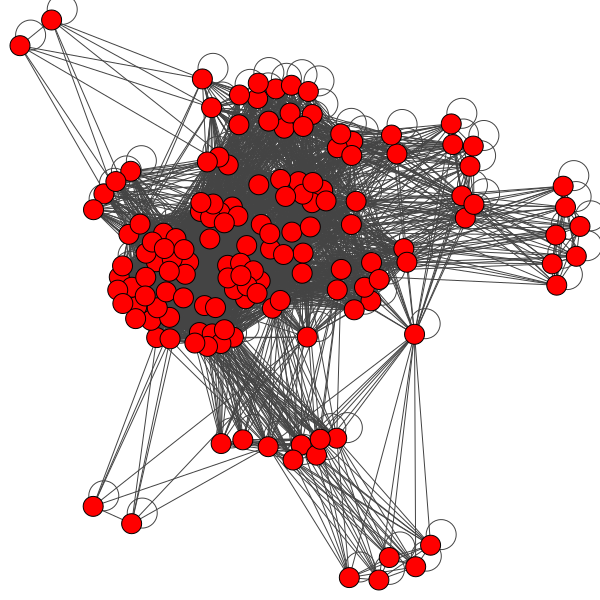

In [90]:
ig.plot(H)

# Divisão de comunidades via Leiden

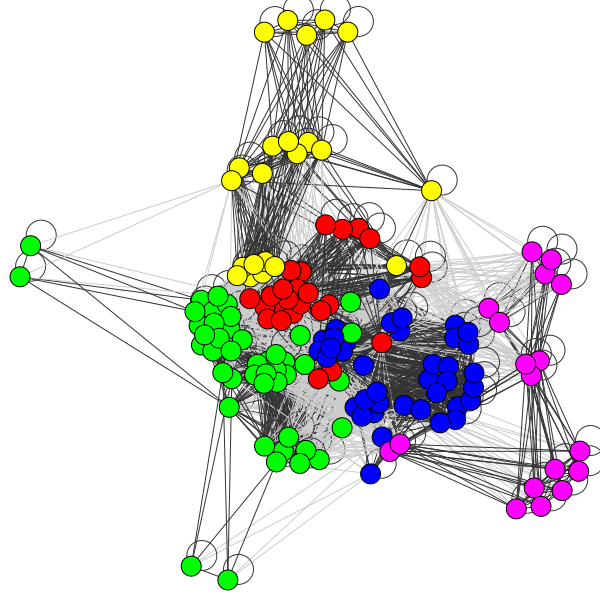

In [91]:
# Agora roda a partição
# Todos os algoritmos utilizados possuem a opção de utilizar arestas com ou sem peso
#   no nosso caso, sempre serão usadas arestas com peso

# Algoritmo de Leiden 
#partition = la.find_partition(H, la.ModularityVertexPartition, weights=H.es()[:]["weight"], n_iterations=50)

# Algoritmo de Infomap Martin Rosvall e Carl T. Bergstrom
# Este algoritmo também aceita vértices com peso, talvez possa ser interessante utilizando algum atributo para os alunos
# Não devide em nenhuma comunidade :(
#partition = H.community_infomap(edge_weights='weight')

# Algoritmo de propagação de labels (??) de Raghavan
# Não divide em nenhuma comunidade
#partition = H.community_label_propagation(weights='weight')

# Algoritmo de Newman
# Em média, divide em 2 comunidades.
# Engraçado que sem colocar pesos ele separa em 3
#partition = H.community_leading_eigenvector(weights='weight')

# Algoritmo de Leiden implementado no Igraph
# Separou em muitas comunidades wtf
# Verificar depois 
partition = H.community_leiden(weights='weight', objective_function='modularity')

# Algoritmo de multilevel de Blondel
# separa de 3 a 4 comunidades
#partition = H.community_multilevel(weights='weight')
ig.plot(partition)



In [92]:
comunidades = []
for com in enumerate(partition.membership):
    print(com)
    while (len(comunidades) <= com[1]):
        comunidades.append([])
    comunidades[com[1]].append(H.vs()[com[0]]["_nx_name"])

import pandas as pd
dados = []
for file in files:
    with open(file, 'r') as csvfile:   
        dados.append(pd.read_csv(csvfile, delimiter=';'))

trilhas = []
with open("../texts/trilhas.txt") as f:
    for line in f.readlines():
        trilhas.append(line.split("\n")[0].split(";"))

print(comunidades)


(0, 0)
(1, 1)
(2, 0)
(3, 1)
(4, 2)
(5, 2)
(6, 2)
(7, 2)
(8, 1)
(9, 3)
(10, 2)
(11, 2)
(12, 2)
(13, 1)
(14, 1)
(15, 2)
(16, 4)
(17, 2)
(18, 3)
(19, 3)
(20, 0)
(21, 3)
(22, 0)
(23, 1)
(24, 1)
(25, 2)
(26, 1)
(27, 3)
(28, 1)
(29, 0)
(30, 1)
(31, 3)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 2)
(38, 0)
(39, 3)
(40, 1)
(41, 1)
(42, 1)
(43, 2)
(44, 1)
(45, 2)
(46, 2)
(47, 1)
(48, 2)
(49, 1)
(50, 1)
(51, 1)
(52, 1)
(53, 2)
(54, 1)
(55, 1)
(56, 2)
(57, 0)
(58, 0)
(59, 1)
(60, 1)
(61, 0)
(62, 2)
(63, 2)
(64, 2)
(65, 2)
(66, 1)
(67, 3)
(68, 0)
(69, 4)
(70, 1)
(71, 1)
(72, 2)
(73, 4)
(74, 2)
(75, 2)
(76, 2)
(77, 1)
(78, 0)
(79, 2)
(80, 0)
(81, 2)
(82, 4)
(83, 0)
(84, 0)
(85, 0)
(86, 2)
(87, 3)
(88, 1)
(89, 3)
(90, 1)
(91, 1)
(92, 1)
(93, 1)
(94, 0)
(95, 2)
(96, 3)
(97, 0)
(98, 1)
(99, 3)
(100, 1)
(101, 0)
(102, 4)
(103, 0)
(104, 0)
(105, 4)
(106, 0)
(107, 2)
(108, 2)
(109, 1)
(110, 2)
(111, 3)
(112, 0)
(113, 1)
(114, 1)
(115, 4)
(116, 0)
(117, 1)
(118, 4)
(119, 0)
(120, 4)
(121, 0)
(122, 2)
(12

In [93]:
import time
time.sleep(5)
# roda o alg de comunidade nas comunidades encontradas
other_partitions = []
for com in comunidades:
    new_g = nx.Graph()
    # adiciona os nós
    for est_id in com:
        new_g.add_node(est_id)
    # adiciona as arestas
    for e in G.edges(data=True):
        if e[0] in new_g.nodes and e[1] in new_g.nodes:
            new_g.add_edge(e[0], e[1], weight=e[2].get('weight', 1))
    new_h = ig.Graph.from_networkx(new_g)
    new_h.is_weighted()
    other_partitions.append(new_h.community_leiden(weights='weight', objective_function='modularity'))
    

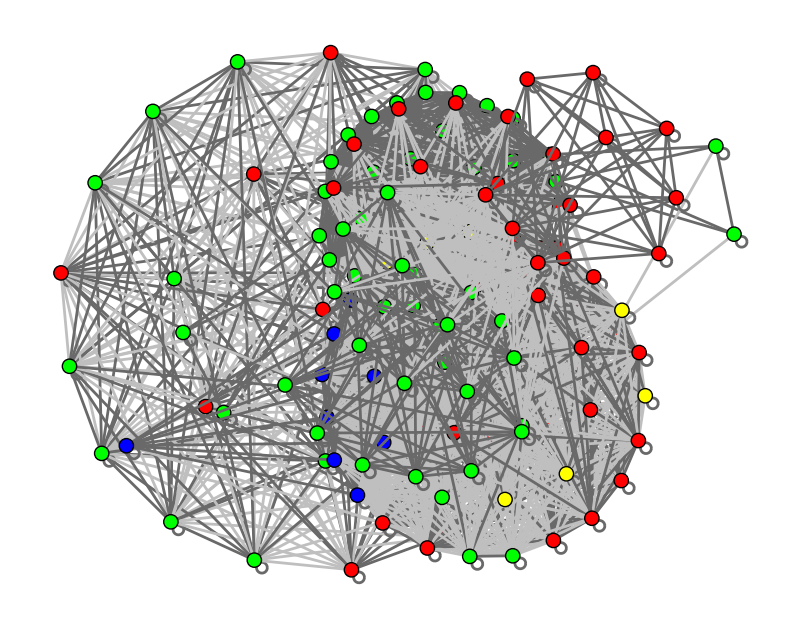

In [94]:
fig, ax = plt.subplots()
for p in other_partitions:
    ig.plot(p, target=ax)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [95]:
rec_comunidades = []
for p in other_partitions:
    for com in enumerate(p.membership):
        if (len(rec_comunidades) <= com[1]):
            rec_comunidades.append([])
        rec_comunidades[com[1]].append(H.vs()[com[0]]["_nx_name"])

import pandas as pd
dados = []
for file in files:
    with open(file, 'r') as csvfile:   
        dados.append(pd.read_csv(csvfile, delimiter=';'))

trilhas = []
with open("../texts/trilhas.txt") as f:
    for line in f.readlines():
        trilhas.append(line.split("\n")[0].split(";"))

print(rec_comunidades)

[['90729', '113853', '118844', '123664', '123676', '123677', '123686', '123736', '136341', '136730', '136731', '150892', '151217', '158257', '90729', '123664', '123676', '123677', '131006', '136731', '136736', '145077', '150887', '156158', '158257', '159067', '160839', '160852', '161216', '161223', '161226', '165432', '165895', '171740', '171745', '171749', '90729', '123676', '123677', '123688', '129034', '131006', '131014', '158257', '160836', '160839', '160855', '161228', '165431', '165685', '165892', '165894', '90729', '113853', '118844', '123664', '123676', '123677', '123686', '131006', '131014', '136731', '90729', '113853', '118844', '123664', '123688', '129034', '131014', '145077', '150873'], ['123688', '129034', '131006', '131014', '136736', '145077', '150873', '150878', '150887', '156158', '159067', '113853', '118844', '123686', '123688', '123736', '129034', '131014', '136341', '136730', '150873', '150878', '150892', '151217', '160836', '160855', '161228', '165431', '165685', '

In [96]:
dados = pd.concat(dados)

In [97]:
dados_filtrados = dados[dados.CODIGO.apply(lambda a: a in optional)]
dados_filtrados = dados_filtrados[[int(x[3].split('/')[2].split(' ')[0]) >= 14 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[float(str(x[7]).replace(',','.')) >= 6 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'ES70N' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'FI70D' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'FI70A' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'GE70F' or x[5] > 2017 for x in dados_filtrados.values]]
#dados_filtrados

# Pega as disciplinas mais populares em cada comunidade
#for idx, comunidade in enumerate(disciplinas_comunidades):
#    print("Comunidade " + str(idx) + ": " + str(Counter(comunidade.CODIGO).most_common()))
i = 0
for comunidade in comunidades:
    if (len(comunidade) > 1):
        print("Comunidade " + str(i) + ":")
        em_trilha = []
        for trilha in trilhas:
            est_in_trilha = 0
            for e_id in range(len(comunidade)):
                for estudante in estudantes:
                    if (estudante.id_anonimo == comunidade[e_id]):
                        if (trilha[0] in estudante.trilhas):
                            est_in_trilha += 1
            if (est_in_trilha > 0):
                print("Trilha " + trilha[0] + ": " + str(est_in_trilha))
        print("\n==================================================================================================================================================================\n")
    i += 1

Comunidade 0:
Trilha Redes De Computadores: 5
Trilha Otimizacao, Modelos Analiticos e de Simulacao: 1
Trilha Banco De Dados: 3
Trilha IHC: 14
Trilha Desenvolvimento Baseado em Plataformas Programacao: 25
Trilha Optativas Isoladas: 4


Comunidade 1:
Trilha Sistemas Inteligentes: 3
Trilha Algoritmos E Complexidade: 1
Trilha Redes De Computadores: 22
Trilha Engenharia De Software: 5
Trilha Otimizacao, Modelos Analiticos e de Simulacao: 5
Trilha Banco De Dados: 2
Trilha IHC: 32
Trilha Engenharia Biomedica: 3


Comunidade 2:
Trilha Processamento Grafico: 37
Trilha Sistemas Inteligentes: 9
Trilha Algoritmos E Complexidade: 2
Trilha Redes De Computadores: 7
Trilha Engenharia De Software: 2
Trilha Banco De Dados: 4
Trilha IHC: 9
Trilha Engenharia Biomedica: 1
Trilha Desenvolvimento Baseado em Plataformas Programacao: 3
Trilha Optativas Isoladas: 1


Comunidade 3:
Trilha Sistemas Inteligentes: 1
Trilha Otimizacao, Modelos Analiticos e de Simulacao: 1
Trilha Fisica: 12
Trilha Banco De Dados: 2
T

In [98]:
'''i = 0
for comunidade in rec_comunidades:
    if (len(comunidade) > 1):
        print("Comunidade " + str(i) + ":")
        em_trilha = []
        for trilha in trilhas:
            est_in_trilha = 0
            for e_id in range(len(comunidade)):
                for estudante in estudantes:
                    if (estudante.id_anonimo == comunidade[e_id]):
                        if (trilha[0] in estudante.trilhas):
                            est_in_trilha += 1
            if (est_in_trilha > 0):
                print("Trilha " + trilha[0] + ": " + str(est_in_trilha))
        print("\n==================================================================================================================================================================\n")
    i += 1'''

'i = 0\nfor comunidade in rec_comunidades:\n    if (len(comunidade) > 1):\n        print("Comunidade " + str(i) + ":")\n        em_trilha = []\n        for trilha in trilhas:\n            est_in_trilha = 0\n            for e_id in range(len(comunidade)):\n                for estudante in estudantes:\n                    if (estudante.id_anonimo == comunidade[e_id]):\n                        if (trilha[0] in estudante.trilhas):\n                            est_in_trilha += 1\n            if (est_in_trilha > 0):\n                print("Trilha " + trilha[0] + ": " + str(est_in_trilha))\n        print("\n==================================================================================================================================================================\n")\n    i += 1'

# Busca os cliques maximais

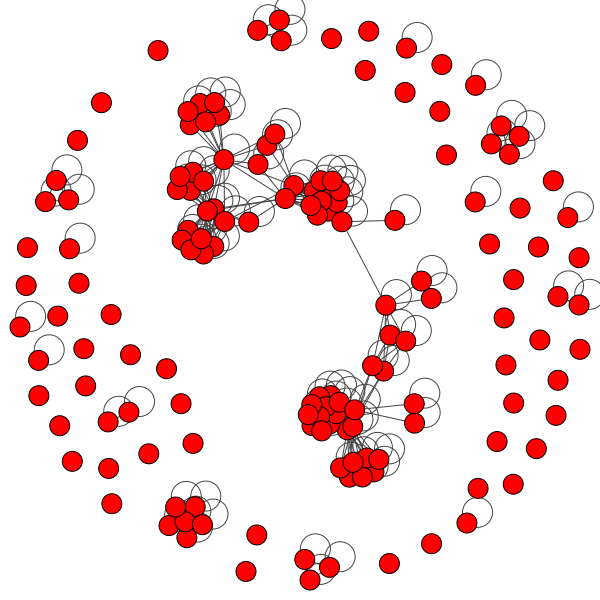

In [99]:
# Utilizando o mesmo grafo H, passa pelas arestas e procura os cliques
H_cliques = H.copy()
# remoção de arestas de peso 1
H_cliques.es.select(weight=1).delete()
#H.es.select(weight=2).delete()

ig.plot(H_cliques)

In [100]:
# Quantos alunos existem? Quantos alunos existem com pelo menos 1 2 graus?
print(len(H_cliques.vs))
vx_degree_2 = []
for v in H_cliques.vs:
    if H_cliques.degree(v) > 1:
        vx_degree_2.append(v)
print(len(vx_degree_2)) 

148
100


[(1, 7, 47), (82, 124, 129), (3, 42, 119), (11, 75, 95), (16, 19, 69), (103, 78, 97), (122, 43, 81, 79), (126, 7, 115, 32), (66, 6, 53, 47), (68, 80, 0, 20), (68, 80, 97, 94, 58), (87, 89, 145, 131, 125, 111), (74, 5, 127, 76, 63, 17, 7), (7, 32, 45), (7, 32, 47), (7, 6, 53, 45), (7, 6, 53, 47), (7, 6, 53, 107, 72, 64, 56, 48), (46, 6, 110, 108, 65, 62, 53, 45, 12), (128, 0, 99, 39, 31, 27, 21, 20, 18), (51, 13, 137, 114, 71, 70, 60, 59, 54, 47, 41, 36, 32), (0, 2, 119, 112, 106, 85, 84, 83, 61, 57, 38, 29, 22, 20)]


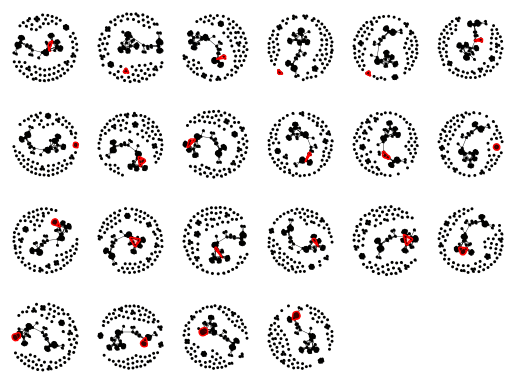

In [101]:
cliques = H_cliques.maximal_cliques(min=3)
print(cliques)

fig, axs = plt.subplots(4, 6)
axs = axs.ravel()
for clique, ax in zip(cliques, axs):
    # Color vertices yellow/red based on whether they are in this clique
    H_cliques.vs['color'] = 'yellow'
    H_cliques.vs[clique]['color'] = 'red'

    # Color edges black/red based on whether they are in this clique
    clique_edges = H_cliques.es.select(_within=clique)
    H_cliques.es['color'] = 'black'
    clique_edges['color'] = 'red'
    # also increase thickness of clique edges
    H_cliques.es['width'] = 0.3
    clique_edges['width'] = 1

    ig.plot(
        ig.VertexCover(H_cliques, [clique]),
        mark_groups=True,
        palette=ig.RainbowPalette(),
        vertex_size=0.5,
        target=ax,
    )
fig.delaxes(axs[22])
fig.delaxes(axs[23])
plt.axis('off')
plt.show()


In [102]:
# análise dos cliques
i = 0
studentes_in_clique = []
for clique in cliques:
    print("Clique " + str(i))
    print("N alunos: " + str(len(clique)) + "; Porcentagem de alunos: " + str((len(clique)/len(vx_degree_2)*100)))
    for c in clique:
        if c not in studentes_in_clique:
            studentes_in_clique.append(c)
        for e in estudantes:
            if e.id_anonimo == H_cliques.vs[c]['_nx_name']:
                print("ID: " + e.id_anonimo + "; Trilhas: " + str(e.trilhas))
    i += 1
    print("================================================================================")
print("N de alunos em cliques: " + str(len(studentes_in_clique)) + "; Porcentagem: " + str(len(studentes_in_clique)/len(vx_degree_2)*100))

Clique 0
N alunos: 3; Porcentagem de alunos: 3.0
ID: 113853; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
Clique 1
N alunos: 3; Porcentagem de alunos: 3.0
ID: 190615; Trilhas: ['Algoritmos E Complexidade', 'Banco De Dados']
ID: 190502; Trilhas: ['Algoritmos E Complexidade', 'Banco De Dados']
ID: 193637; Trilhas: ['Algoritmos E Complexidade', 'Banco De Dados']
Clique 2
N alunos: 3; Porcentagem de alunos: 3.0
ID: 123664; Trilhas: ['Otimizacao, Modelos Analiticos e de Simulacao', 'IHC']
ID: 171745; Trilhas: ['Otimizacao, Modelos Analiticos e de Simulacao', 'IHC']
ID: 186026; Trilhas: ['Otimizacao, Modelos Analiticos e de Simulacao', 'IHC', 'Desenvolvimento Baseado em Plataformas Programacao']
Clique 3
N alunos: 3; Porcentagem de alunos: 3.0
ID: 131014; Trilhas: ['Processam

## K-cliques

Os k-cliques não são um bom encaixe para a análise deste grafo. O maior clique do grafo possui 26 nós, o que faz com que qualquer análise com k-cliqes menores fique muito difícil, por conta da quantidade de cliques similares que o grafo possui. Logo, foi apenas mantida a análise de cliques maximais.

In [103]:
def get_kcliques_communities(G, k):
    g = G.copy()
    # remove as arestas com peso menor que 2
    to_remove = [(a,b) for a, b, attrs in g.edges(data=True) if attrs["weight"] < 2]
    g.remove_edges_from(to_remove)
    k_cliques = list(nx.community.k_clique_communities(g, k))
    k_cliques_list = []
    for set in k_cliques:
        k_cliques_list.append(list(set))
    # são os mesmos cliques presentes na análise do igraph (amém)
    return k_cliques_list


In [104]:
all_k_cliques = []
for k in range(3, 10):
    k_cliques = get_kcliques_communities(G, k)
    all_k_cliques.append({"k":k, "k_cliques":k_cliques})
print(all_k_cliques)

[{'k': 3, 'k_cliques': [['186024', '123677', '193632', '150873', '189048', '179652', '123688'], ['171755', '172208', '175799', '171754', '179402', '172046', '171751', '190706', '179393', '179819', '182913', '172248', '179389', '172974', '161228', '179823', '136341', '171750', '179397', '183414', '183413', '172975', '179822', '136730', '202688', '123688', '171740', '175468', '179624', '165892', '123686', '113853'], ['165895', '160841', '180984', '191284', '156158', '157060', '150878', '179408', '177422', '198543', '150892', '186026', '136734', '179385', '193634', '190499', '151217', '161216', '166050', '198372', '172042', '160852', '90729', '118844', '175962', '161226'], ['110307', '190684', '251697', '11357', '198761', '177170'], ['123664', '186026', '171745'], ['190508', '186037', '171746', '190495'], ['169044', '190494', '157060'], ['137191', '131014', '186036'], ['193637', '190615', '190502'], ['150887', '182856', '145077']]}, {'k': 4, 'k_cliques': [['186024', '123677', '193632', '1

In [105]:
def show_Kcliques(pos):
    g = G.copy()
    # remove as arestas com peso menor que 2
    to_remove = [(a,b) for a, b, attrs in g.edges(data=True) if attrs["weight"] < 2]
    g.remove_edges_from(to_remove)
    h = ig.Graph().from_networkx(g)
    fig, axs = plt.subplots(1, len(all_k_cliques[pos]["k_cliques"]))
    axs = axs.ravel()
    for c, ax in zip(all_k_cliques[pos]["k_cliques"], axs):
        # pega as posições dos nós
        clique = []
        for i in range(len(h.vs)):
            for node_c in c:
                if node_c == h.vs[i]["_nx_name"]:
                    clique.append(i)
        # Color vertices yellow/red based on whether they are in this clique
        h.vs['color'] = 'yellow'
        h.vs[clique]['color'] = 'red'

        # Color edges black/red based on whether they are in this clique
        clique_edges = H_cliques.es.select(_within=clique)
        h.es['color'] = 'black'
        clique_edges['color'] = 'red'
        # also increase thickness of clique edges
        h.es['width'] = 0.3
        clique_edges['width'] = 1

        ig.plot(
            ig.VertexCover(h, [clique]),
            mark_groups=True,
            palette=ig.RainbowPalette(),
            vertex_size=0.5,
            target=ax,
        )
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.axis('off')
    # análise dos cliques
    i = 0
    studentes_in_clique = []
    for clique in all_k_cliques[pos]["k_cliques"]:
        print("Clique " + str(i))
        print("N alunos: " + str(len(clique)) + "; Porcentagem de alunos: " + str((len(clique)/len(vx_degree_2)*100)))
        for c in clique:
            if c not in studentes_in_clique:
                studentes_in_clique.append(c)
            for e in estudantes:
                if e.id_anonimo == c:
                    print("ID: " + e.id_anonimo + "; Trilhas: " + str(e.trilhas))
        i += 1
        print("================================================================================")
    print("N de alunos em cliques: " + str(len(studentes_in_clique)) + "; Porcentagem: " + str(len(studentes_in_clique)/len(vx_degree_2)*100))

## Kcliques - K = 3

Clique 0
N alunos: 7; Porcentagem de alunos: 7.000000000000001
ID: 186024; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123677; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 193632; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 150873; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 189048; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 179652; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
Clique 1
N alunos: 32; Porcentagem de alunos: 32.0
ID: 171755; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes']
ID: 172208; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'IHC']
ID: 175799; Trilhas: ['Processamento Grafico', 'IHC']
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 179402; Trilhas: ['Algoritmos E Complexi

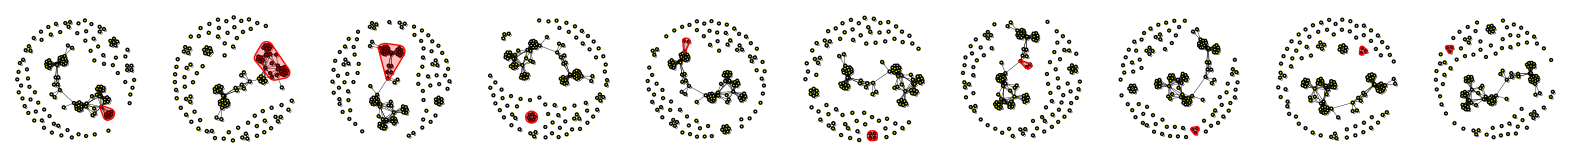

In [106]:
show_Kcliques(0)
plt.show()

## Kcliques - K = 4

Clique 0
N alunos: 7; Porcentagem de alunos: 7.000000000000001
ID: 186024; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123677; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 193632; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 150873; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 189048; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 179652; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
Clique 1
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De C

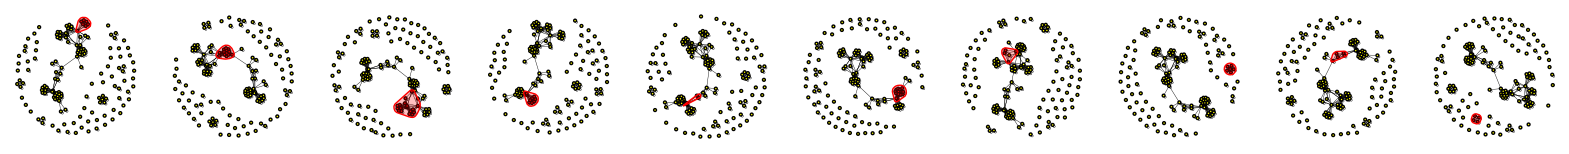

In [107]:
show_Kcliques(1)
plt.show()

## Kcliques - K = 5

Clique 0
N alunos: 7; Porcentagem de alunos: 7.000000000000001
ID: 186024; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123677; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 193632; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 150873; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 189048; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 179652; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
Clique 1
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De C

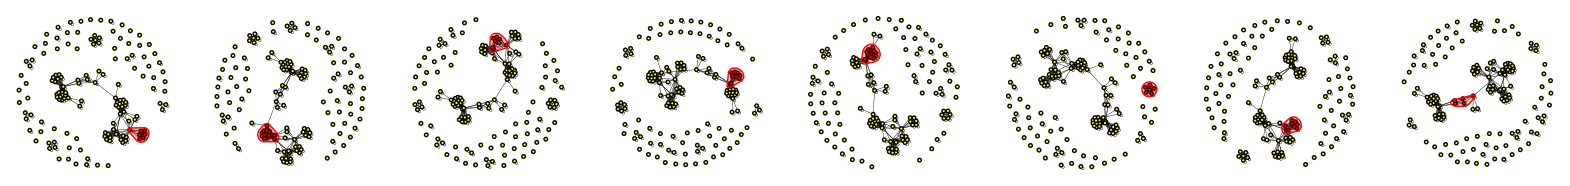

In [108]:
show_Kcliques(2)
plt.show()

## Kcliques - K = 6

Clique 0
N alunos: 7; Porcentagem de alunos: 7.000000000000001
ID: 186024; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123677; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 193632; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 150873; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 189048; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 179652; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
Clique 1
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De C

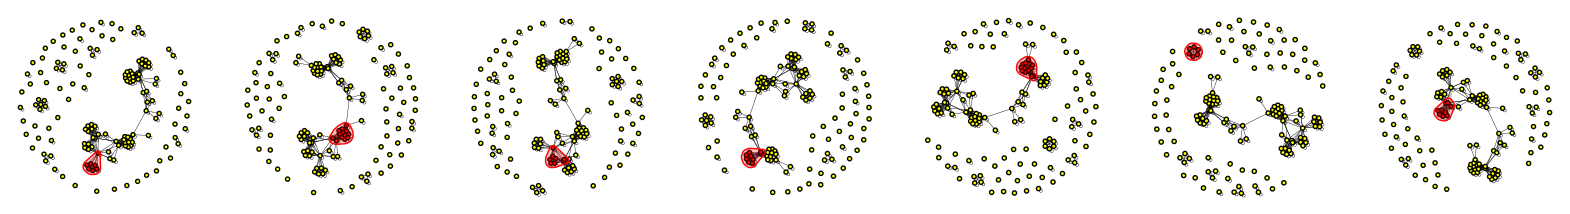

In [109]:
show_Kcliques(3)
plt.show()

## Kcliques - K = 7

Clique 0
N alunos: 7; Porcentagem de alunos: 7.000000000000001
ID: 186024; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123677; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 193632; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 150873; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 189048; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 179652; Trilhas: ['Processamento Grafico', 'Redes De Computadores']
ID: 123688; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes', 'Algoritmos E Complexidade', 'Redes De Computadores']
Clique 1
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De C

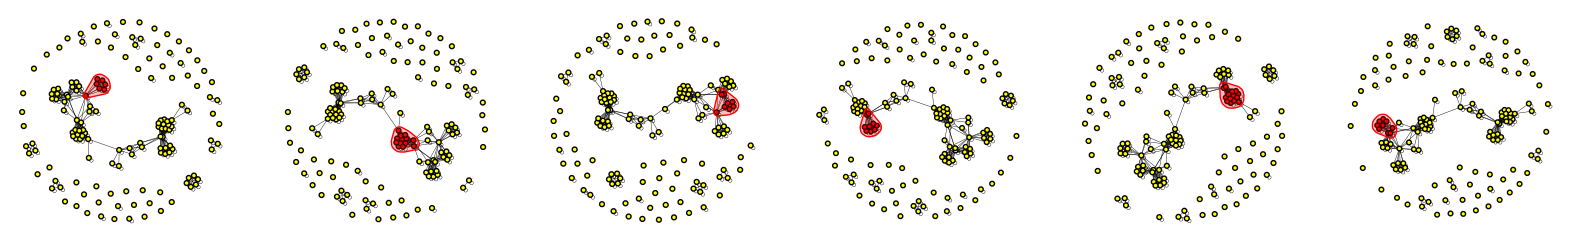

In [110]:
show_Kcliques(4)
plt.show()

## Kcliques - K = 8

Clique 0
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De Computadores', 'Banco De Dados', 'IHC']
ID: 171740; Trilhas: ['Redes De Computadores', 'IHC']
ID: 182913; Trilhas: ['Redes De Computadores', 'IHC']
ID: 172248; Trilhas: ['Redes De Computadores', 'IHC']
ID: 165892; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179389; Trilhas: ['Redes De Computadores', 'IHC']
ID: 172046; Trilhas: ['Redes De Computadores', 'IHC']
ID: 161228; Trilhas: ['Algoritmos E Complexidade', 'Redes De Computadores', 'IHC']
Clique 1
N alunos: 8; Porcentagem de alunos: 8.0
ID: 171755; Trilhas: ['Processamento Grafico', 'Sistemas Inteligentes']
ID: 172208; Trilhas: ['Processamento Grafico', 'Sistem

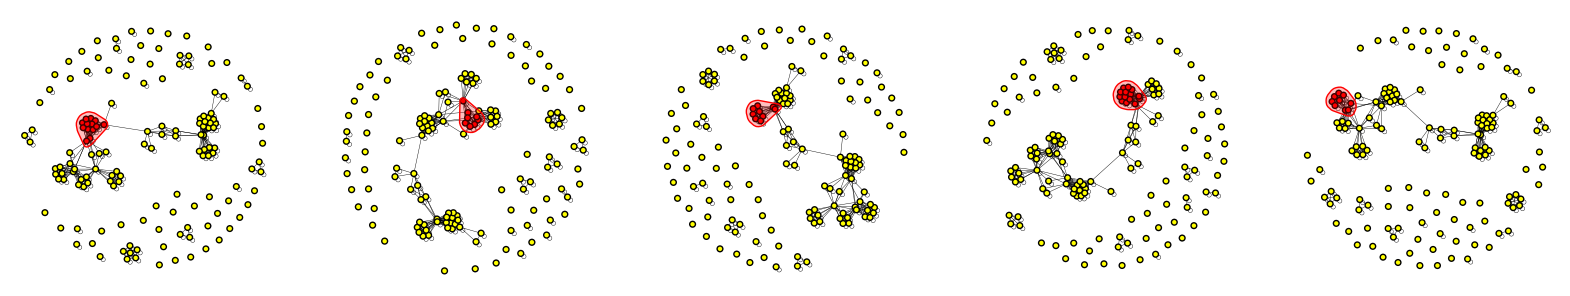

In [111]:
show_Kcliques(5)
plt.show()

## Kcliques - K = 9

Clique 0
N alunos: 13; Porcentagem de alunos: 13.0
ID: 171754; Trilhas: ['Sistemas Inteligentes', 'Redes De Computadores', 'IHC']
ID: 183413; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179397; Trilhas: ['Redes De Computadores', 'IHC']
ID: 136730; Trilhas: ['Redes De Computadores', 'IHC']
ID: 202688; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179393; Trilhas: ['Redes De Computadores', 'Banco De Dados', 'IHC']
ID: 171740; Trilhas: ['Redes De Computadores', 'IHC']
ID: 182913; Trilhas: ['Redes De Computadores', 'IHC']
ID: 172248; Trilhas: ['Redes De Computadores', 'IHC']
ID: 165892; Trilhas: ['Redes De Computadores', 'IHC']
ID: 179389; Trilhas: ['Redes De Computadores', 'IHC']
ID: 172046; Trilhas: ['Redes De Computadores', 'IHC']
ID: 161228; Trilhas: ['Algoritmos E Complexidade', 'Redes De Computadores', 'IHC']
Clique 1
N alunos: 9; Porcentagem de alunos: 9.0
ID: 160841; Trilhas: ['IHC', 'Optativas Isoladas']
ID: 166050; Trilhas: ['IHC', 'Optativas Isoladas']
ID: 160852; Trilhas: ['I

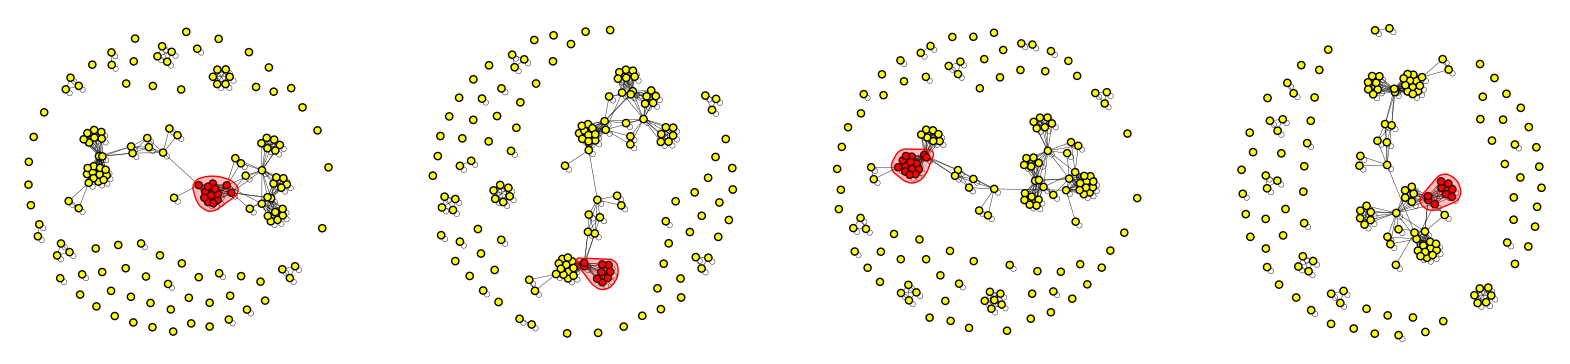

In [112]:
show_Kcliques(6)
plt.show()